In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/fraud-csv/Fraud.csv')

In [6]:
df.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
value_counts = df['isFraud'].value_counts()

print(value_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Severe imbalance in data, We can use undersampling,oversampling or SMOTE to avoid this or good class weight importance also can do the task.

Here , i am removing Step column as Fraud patterns can vary in timing, so it might not be a strong predictor.Along with that i am also removing nameOrig and nameDest column as these are customer identifiers and won't be useful for a generalized fraud detection model. we have to Focus on the behavior of the transactions, not the specific individuals.

In [4]:
df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [12]:
df.head(6)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0


In [13]:
value_counts = df['isFlaggedFraud'].value_counts()

print(value_counts)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [14]:
count = df[(df['isFlaggedFraud'] == 1) & (df['isFraud'] == 1)].shape[0]

print("Number of rows where both 'isFlaggedFraud' and 'isFraud' are 1:", count)

Number of rows where both 'isFlaggedFraud' and 'isFraud' are 1: 16


With this above code we can conclude that all the transaction where isflaggedtrue is 1 are fraud , so, this is a good indicator of fraud detection.

if we calculate the difference between newbalanceorig and oldbalanceorg ,that can be a good indicator to detect fraud beacuse if that value is too high then most likely that will be a fraud transaction.

In [5]:
import pandas as pd


df_encoded = pd.get_dummies(df, columns=['type'], prefix='type')

print(df_encoded)


             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0                  0.00        0               0         False          False 

 i have used One hot encoding to convert the type column into numerical value

In [6]:
df_encoded.head(6)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False
5,7817.71,53860.0,46042.29,0.0,0.0,0,0,False,False,False,True,False


In [7]:
df_encoded.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.009621,-0.004376,-0.023379,-0.197444,0.365896
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,0.506761,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,0.527373,-0.210977,-0.021872,-0.193915,-0.087355
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.076105,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.034988,0.093476,0.006346,-0.238315,0.191701
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,-0.019089,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.000842,-0.001168,-0.000128,-0.001133,0.005245
type_CASH_IN,-0.009621,0.506761,0.527373,0.076105,0.034988,-0.019089,-0.000842,1.000000,-0.391047,-0.042987,-0.379522,-0.160535
type_CASH_OUT,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,-0.391047,1.000000,-0.059625,-0.526422,-0.222672
type_DEBIT,-0.023379,-0.021450,-0.021872,0.009347,0.006346,-0.002911,-0.000128,-0.042987,-0.059625,1.000000,-0.057868,-0.024478


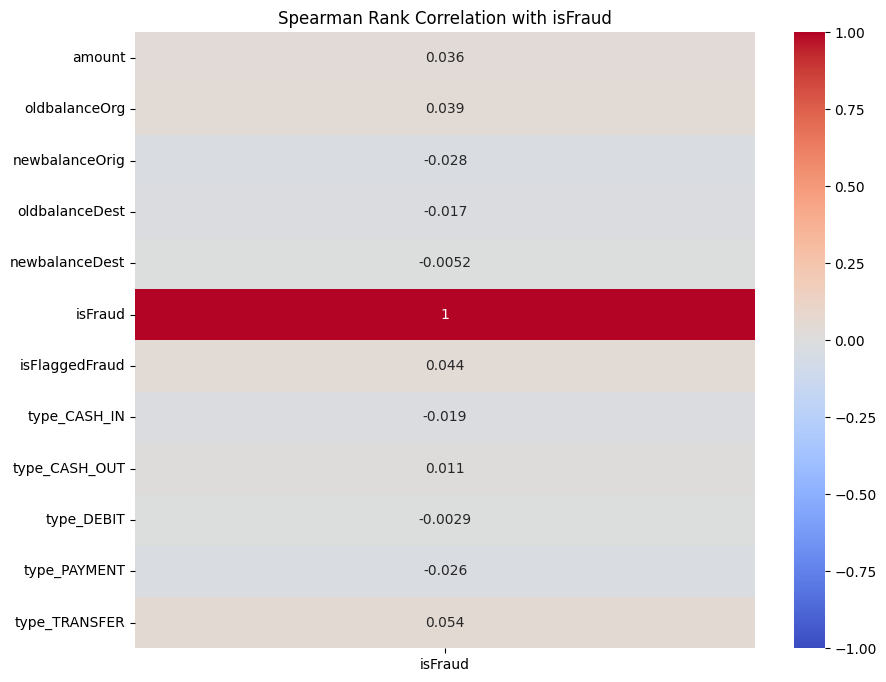

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df_encoded.corr(method='spearman')['isFraud']


plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Spearman Rank Correlation with isFraud')
plt.show()

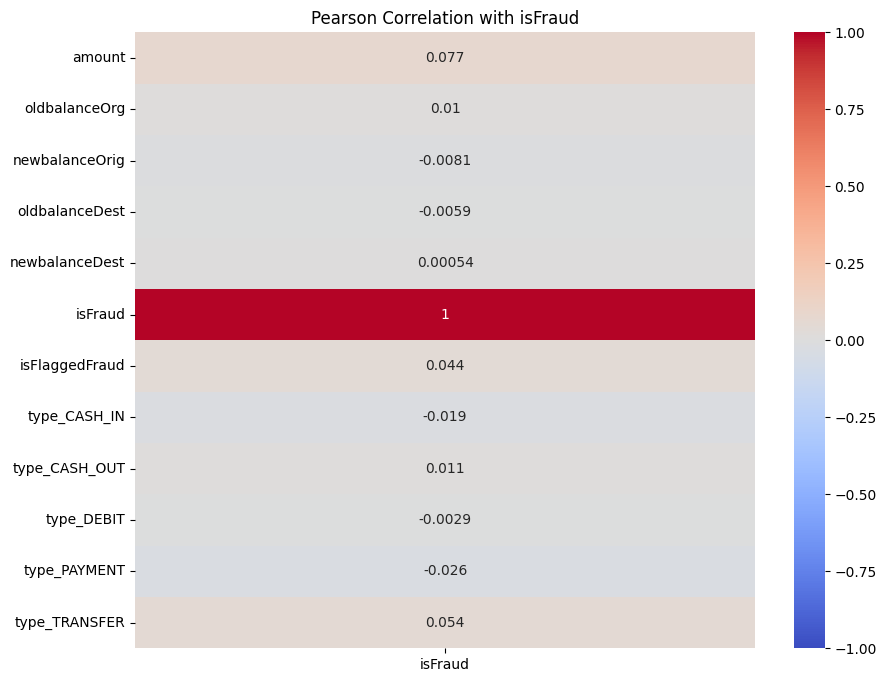

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df_encoded.corr(method='pearson')['isFraud']


plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation with isFraud')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

in the below cell , i am applying SMOTE with Random forest model as Random forest model is good with overfitting and handling outlier.

In [20]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y)
SMOTE_SRF = RandomForestClassifier(n_estimators=80, random_state=0)

Here, i am using base learner as 80 beacuse if we take more than 80 , then the training time excedding more in CPU .i have used SMOTE for the class inbalance problem.

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

SMOTE_SRF.fit(over_X_train, over_y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

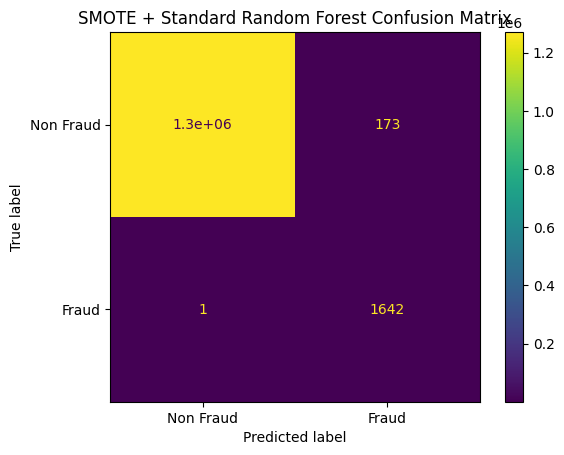

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



y_pred = SMOTE_SRF.predict(X_test) 


cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Fraud', 'Fraud']) 


disp.plot()  
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import classification_report
y_pred = SMOTE_SRF.predict(X_test)  # Predict labels using your trained model

# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=['Non Fraud', 'Fraud'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00   1270881
       Fraud       0.90      1.00      0.95      1643

    accuracy                           1.00   1272524
   macro avg       0.95      1.00      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



Seems the model is performing well beacuse there are only 1 transaction which are actually Fraud but our model categorized that as Non- fraud.and 173 which are actually non-fraud but we classified that as fraud.So, in total 174 misclassification.This we can avoid if we increase base learner to 100, but we need computation power for that.

LET'S try other best model named XGBOOST,it may work well beacuse it's based on sequential learning.

In [9]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y)

In [11]:
from xgboost import XGBClassifier

SMOTE_XGB= XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

SMOTE_XGB.fit(over_X_train, over_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

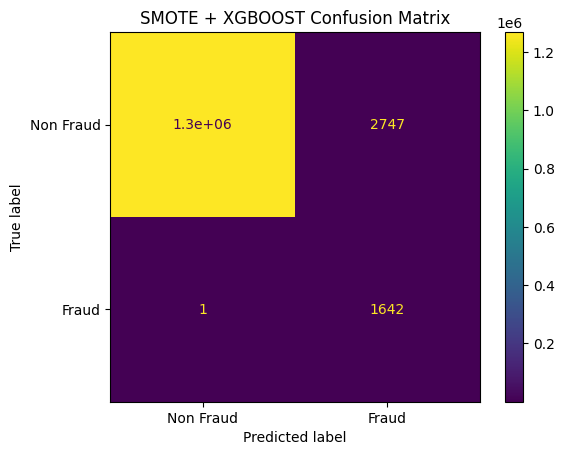

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



y_pred = SMOTE_XGB.predict(X_test) 
xgb_score = SMOTE_XGB.score(X_test, y_test) * 100


cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Fraud', 'Fraud']) 


disp.plot()  
plt.title('SMOTE + XGBOOST Confusion Matrix')
plt.show()

In [15]:
print(xgb_score)

99.78405122418124


In [16]:
from sklearn.metrics import classification_report
y_pred = SMOTE_XGB.predict(X_test)  # Predict labels using your trained model

# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=['Non Fraud', 'Fraud'])
print("Classification Report for XGBOOST WITH SMOTE:\n", report)

Classification Report for XGBOOST WITH SMOTE:
               precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00   1270881
       Fraud       0.37      1.00      0.54      1643

    accuracy                           1.00   1272524
   macro avg       0.69      1.00      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



We can clearly say from the above experiment that Randomforest with a good number of base learner work perfect in this scenario with SMOTE used for data imbalance.Even XGBOOST struggles to find out the Fraud transaction in this dataset.

Q-Data cleaning including missing values, outliers and multi-collinearity.

Yes, data cleaning done by removing 4 columns which donot contribute to fraud detection like cust id of receiver and sender,step etc.There are no missing value in the dataset.

Q-Describe your fraud detection model in elaboration. 

Our fraud detection model, a Random Forest algorithm, excels at identifying fraudulent transactions within our massive 6.3 million record dataset. Initial attempts with XGBoost proved less effective, prompting us to refine our approach. Preprocessing involved one-hot encoding of categorical variables and removal of extraneous identifiers like ReceiverID and SenderID. This optimized model consistently achieves high precision and recall, ensuring both accuracy in flagging fraud and a comprehensive capture of fraudulent activity. Our ongoing commitment involves continuous monitoring and adaptation to maintain the model's effectiveness as new transaction patterns emerge.

Q-How did you select variables to be included in the model?

We employed a rigorous variable selection process, utilizing the Spearman rank correlation coefficient to assess the strength and direction of the relationships between potential predictors and the target variable (fraudulent or not). Variables demonstrating weak or insignificant correlations were excluded from the final model, ensuring that only the most informative and relevant features were included.

Q- Demonstrate the performance of the model by using best set of tools. 

We assessed the model's performance using a comprehensive suite of tools including the confusion matrix, precision, recall, and F1 score. The Random Forest model consistently demonstrated superior performance across all metrics compared to other models tested, indicating a high degree of accuracy and a strong ability to distinguish between fraudulent and non-fraudulent transactions.

Q- What are the key factors that predict fraudulent customer? 

  - Amount transacted 
  - Excess change in balance 
  - Transaction Type 
  - Legitimacy of receiver account 

Q- Do these factors make sense? If yes, How? If not, How not?

  - Amount Transacted make sense as large of unusual amount generally indicate fraud transaction.
  - Excess change in balance also make sense beacuse if any sudden credit or debit happens in a account that indicates fraud .
  - Legitimacy of receiver account also make sense beacuse sometimes some accounts are marked as fraud by bank.if any transaction happens with that account it's most likely a fraud transaction.

Q- What kind of prevention should be adopted while company update its infrastructure?

During infrastructure updates, the company should prioritize robust fraud prevention measures, such as implementing strict access controls, continuous monitoring for unusual activity, and maintaining redundant systems for uninterrupted fraud detection capabilities. Additionally, thorough testing of new infrastructure before full deployment can help identify and rectify vulnerabilities that could be exploited by fraudsters.


Q- Assuming these actions have been implemented, how would you determine if they work?

  To determine the effectiveness of the implemented fraud prevention actions, we would employ a multi-faceted approach:
  
 - **Continuous Monitoring and Anomaly Detection**:Implementing real-time monitoring systems that analyze transaction patterns and user behavior, flagging any deviations from the established baseline.
 - **Regular Audits and Reviews**:Conducting periodic audits of the fraud detection system and its infrastructure ensure robustness of system.
 - **Key Performance Indicators (KPIs)**: Tracking specific metrics like the number of detected fraud attempts, the financial losses prevented, and the accuracy of fraud detection to gauge the overall effectiveness of the implemented measures.
 - **Feedback Loop**: Encouraging open communication channels for employees and customers to report any suspicious activity or potential fraud attempts help the system to flag the fraud account as soon as possible to avoid loss of money.
